# Design a lowpass filter for encoder

In [9]:
#import liprary
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

In [10]:
# Given values
Pulse_per_rotation = 540  # Pulses Per Revolution
wheel_radius = 40  # cm
max_speed = 0.5  # m/s

# Calculate distance per rotation of the wheel
distance_per_rotation = 2 * np.pi * wheel_radius /100 
rotation_per_sec = max_speed / distance_per_rotation             # RPS
Pulse_per_sec = Pulse_per_rotation * rotation_per_sec            #PPS


In [11]:
# Low-pass filter
critical_time = 2
cutoff_Freq   = Pulse_per_sec                 # cut-off frequency
sampling_Freq = 1000;                        # sampled at 1 kHz = 1000 samples / second

w0 = 2 * np.pi * cutoff_Freq;                # pole frequency (rad/s)
num = w0                                     # transfer function numerator coefficients
den = [1,w0]                                 # transfer function denominator coefficients
lowPass = signal.TransferFunction(num, den)  # Transfer function


(-13.552921637240644, -1.5052053077773683e-05)

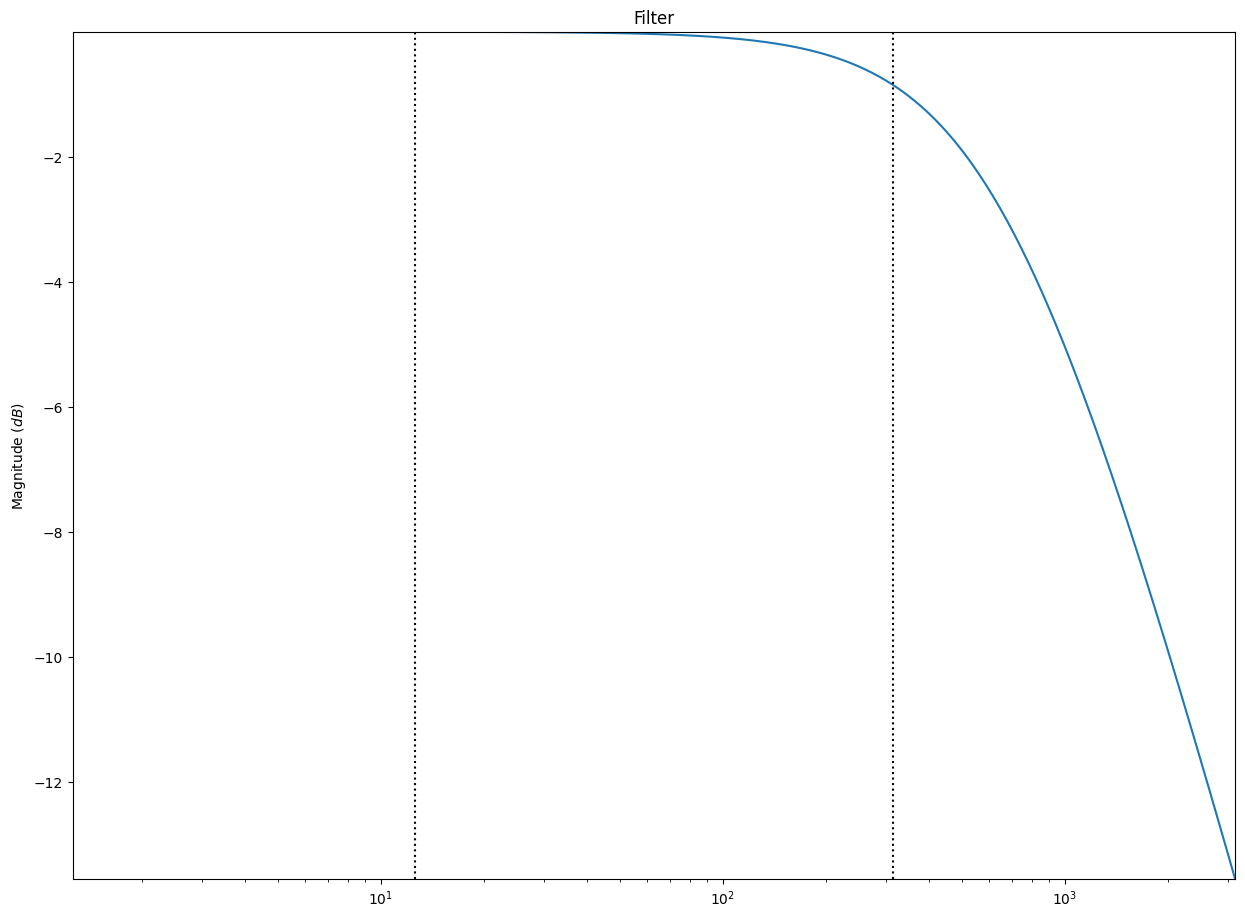

In [12]:
# Generate the bode plot
signalFreq = [2,50]; # Cycles / second
signalMag = [1,0.2]; # magnitude of each sine
w = np.logspace( np.log10(min(signalFreq)*2*np.pi/10), np.log10(max(signalFreq)*2*np.pi*10), 500 )
w, mag, phase = signal.bode(lowPass,w)


# Magnitude plot
plt.figure(figsize=(15,11))
plt.semilogx(w, mag)
for sf in signalFreq:
    plt.semilogx([sf*2*np.pi,sf*2*np.pi],[min(mag),max(mag)],'k:')

plt.title("Filter")
plt.ylabel("Magnitude ($dB$)")
plt.xlim([min(w),max(w)])
plt.ylim([min(mag),max(mag)])

In [13]:
dt = 1.0/sampling_Freq;
discreteLowPass = lowPass.to_discrete(dt, method='gbt' ,alpha=0.5)
print(discreteLowPass)

TransferFunctionDiscrete(
array([0.25233645, 0.25233645]),
array([ 1.       , -0.4953271]),
dt: 0.001
)


In [14]:
b = discreteLowPass.num;
a = -discreteLowPass.den;

print(f' b : {discreteLowPass.num}')
print(f' a : {-discreteLowPass.den}')

 b : [0.25233645 0.25233645]
 a : [-1.         0.4953271]


In [15]:
print(f' y[n] = {a[1]:.3} y[n-1] + {b[0]:.3} x[n] + {b[1]:.3} x[n-1]')

 y[n] = 0.495 y[n-1] + 0.252 x[n] + 0.252 x[n-1]


In [16]:
# The coefficients from the discrete form of the filter transfer function (but with a negative sign)

print("Filter coefficients b_i: " + str(b))
print("Filter coefficients a_i: " + str(a[1:]))


Filter coefficients b_i: [0.25233645 0.25233645]
Filter coefficients a_i: [0.4953271]
